<a href="https://colab.research.google.com/github/yaseemarusiru/Image_Processing_and_Machine_Vision/blob/main/EN3160_Assignment_3_210157A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epa Y.R.A. 210157A

1.

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [37]:
# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [45]:
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [46]:
# 2. Define Network Parameters

Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Number of hidden units
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)  # Biases for input to hidden layer
w2 = torch.randn(H, K) * std  # Weights for hidden to output layer
b2 = torch.zeros(K)  # Biases for hidden to output layer

# Hyperparameters
iterations = 10
lr = 0.1  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 1e-5  # Regularization
loss_history = []

Epoch 1/10, Loss: 2.0343219316005707
Epoch 2/10, Loss: 1.7811493264436722
Epoch 3/10, Loss: 1.698031926870346
Epoch 4/10, Loss: 1.6467652707099913
Epoch 5/10, Loss: 1.6064629360437392
Epoch 6/10, Loss: 1.571617124915123
Epoch 7/10, Loss: 1.542754835486412
Epoch 8/10, Loss: 1.5150390717983246
Epoch 9/10, Loss: 1.4911443680524825
Epoch 10/10, Loss: 1.470106577038765


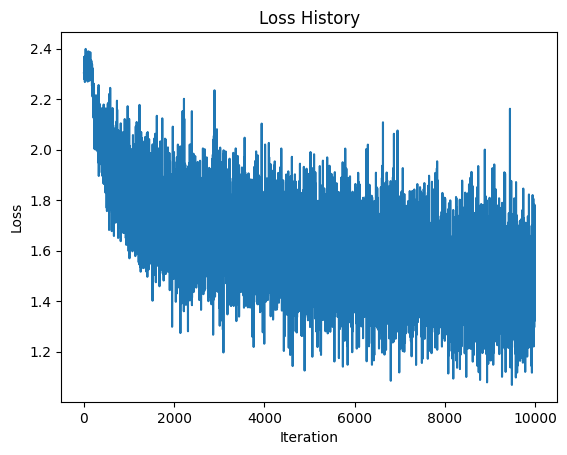

In [47]:
# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        h = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        y_pred = h.mm(w2) + b2  # Output layer activation

        # Loss calculation (Cross-Entropy Loss)
        criterion = nn.CrossEntropyLoss()
        loss = criterion(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = torch.zeros_like(y_pred)
        dy_pred.scatter_(1, labels.unsqueeze(1), -1)
        dy_pred += torch.softmax(y_pred, dim=1)
        dy_pred /= Ntr

        dh = dy_pred.mm(w2.t())
        dh_sigmoid = h * (1 - h) * dh

        dw2 = h.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        dw1 = x_train.t().mm(dh_sigmoid) + reg * w1
        db1 = dh_sigmoid.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")
    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [48]:
# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        h = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = h.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        h = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = h.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Training accuracy: 50.31%
Test accuracy: 47.10%


2.

[1, 100] loss: 0.914
[1, 200] loss: 0.311
[1, 300] loss: 0.218
[1, 400] loss: 0.188
[1, 500] loss: 0.141
[1, 600] loss: 0.118
[1, 700] loss: 0.109
[1, 800] loss: 0.102
[1, 900] loss: 0.094
[2, 100] loss: 0.069
[2, 200] loss: 0.077
[2, 300] loss: 0.064
[2, 400] loss: 0.069
[2, 500] loss: 0.069
[2, 600] loss: 0.063
[2, 700] loss: 0.060
[2, 800] loss: 0.074
[2, 900] loss: 0.061
[3, 100] loss: 0.043
[3, 200] loss: 0.044
[3, 300] loss: 0.042
[3, 400] loss: 0.046
[3, 500] loss: 0.056
[3, 600] loss: 0.041
[3, 700] loss: 0.056
[3, 800] loss: 0.042
[3, 900] loss: 0.043
[4, 100] loss: 0.028
[4, 200] loss: 0.036
[4, 300] loss: 0.040
[4, 400] loss: 0.032
[4, 500] loss: 0.038
[4, 600] loss: 0.041
[4, 700] loss: 0.039
[4, 800] loss: 0.031
[4, 900] loss: 0.039
[5, 100] loss: 0.028
[5, 200] loss: 0.027
[5, 300] loss: 0.030
[5, 400] loss: 0.028
[5, 500] loss: 0.026
[5, 600] loss: 0.028
[5, 700] loss: 0.032
[5, 800] loss: 0.024
[5, 900] loss: 0.026
[6, 100] loss: 0.021
[6, 200] loss: 0.021
[6, 300] loss

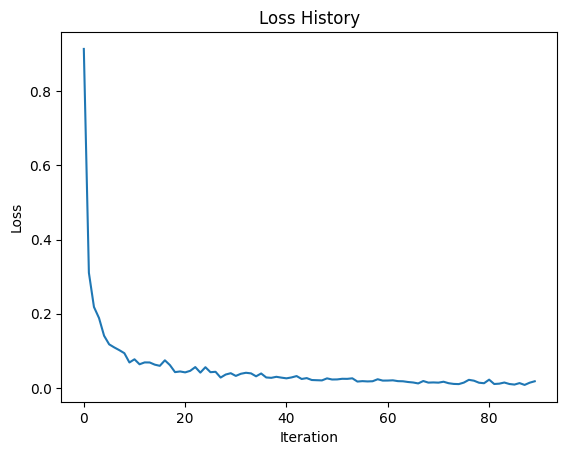

Training accuracy: 99.81%
Test accuracy: 99.27%


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

batch_size=64
trainset=torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testset=torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.conv1=nn.Conv2d(1,6,kernel_size=5,padding=2)
        self.pool1=nn.AvgPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(6,16,kernel_size=5,padding=2)
        self.pool2=nn.AvgPool2d(kernel_size=2,stride=2)
        self.conv3=nn.Conv2d(16,120,kernel_size=5,padding=2)
        self.fc1=nn.Linear(120*7*7,84)
        self.fc2=nn.Linear(84,10)

    def forward(self,x):
        x=torch.relu(self.conv1(x))
        x=self.pool1(x)
        x=torch.relu(self.conv2(x))
        x=self.pool2(x)
        x=torch.relu(self.conv3(x))
        x=x.view(-1, 120 * 7 * 7)
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x


net=LeNet5()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=0.001)


num_epochs=10
loss_history=[]

for epoch in range(num_epochs):
    running_loss=0.0
    for i, data in enumerate(trainloader,0):
        inputs,labels=data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs=net(inputs)
        loss=criterion(outputs,labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if i%100==99:
            print(f"[{epoch+1},{i+1}] loss: {running_loss/100:.3f}")
            loss_history.append(running_loss/100)
            running_loss=0.0

print('Finished Training')

plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

correct_train=0
total_train=0
with torch.no_grad():
    for data in trainloader:
        inputs,labels=data
        outputs=net(inputs)
        _, predicted=torch.max(outputs.data,1)
        total_train+=labels.size(0)
        correct_train+=(predicted==labels).sum().item()

train_acc=100*correct_train/total_train
print(f"Training accuracy:{train_acc:.2f}%")

correct_test=0
total_test=0
with torch.no_grad():
    for data in testloader:
        inputs,labels=data
        outputs=net(inputs)
        _, predicted=torch.max(outputs.data,1)
        total_test+=labels.size(0)
        correct_test+=(predicted==labels).sum().item()

test_acc=100*correct_test/total_test
print(f"Test accuracy: {test_acc:.2f}%")

3.

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
from torch.optim import lr_scheduler
from tempfile import TemporaryDirectory

data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
    'val': transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),}

data_dir='drive/MyDrive/hymenoptera_data'
image_datasets={x:torchvision.datasets.ImageFolder(os.path.join(data_dir,x),data_transforms[x]) for x in ['train','val']}
dataloaders={x:torch.utils.data.DataLoader(image_datasets[x],batch_size=4,shuffle=True,num_workers=4) for x in ['train','val']}
dataset_sizes={x:len(image_datasets[x]) for x in ['train','val']}
class_names=image_datasets['train'].classes

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [2]:
device

device(type='cuda', index=0)

In [3]:
def train_model(model,criterion, optimizer,scheduler,num_epochs=25):
    since =time.time()
    # temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path=os.path.join(tempdir,'best_model_params.pt')
        torch.save(model.state_dict(),best_model_params_path)
        best_acc=0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-'*10)

            for phase in ['train','val']:
                if phase=='train':
                    model.train()
                else:
                    model.eval()

                running_loss=0.0
                running_corrects=0

                for inputs,labels in dataloaders[phase]:
                    inputs=inputs.to(device)
                    labels=labels.to(device)

                    optimizer.zero_grad()

                    # forward
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs=model(inputs)
                        _, preds =torch.max(outputs, 1)
                        loss =criterion(outputs, labels)

                        # backward and optimize only if in training phase
                        if phase=='train':
                            loss.backward()
                            optimizer.step()

                    running_loss+=loss.item()*inputs.size(0)
                    running_corrects+=torch.sum(preds==labels.data)
                if phase=='train':
                    scheduler.step()

                epoch_loss=running_loss/dataset_sizes[phase]
                epoch_acc=running_corrects.double()/dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                if phase=='val' and epoch_acc>best_acc:
                    best_acc=epoch_acc
                    torch.save(model.state_dict(),best_model_params_path)
            print()

        time_elapsed=time.time()-since
        print(f'Training complete in {time_elapsed //60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        model.load_state_dict(torch.load(best_model_params_path))
    return model

Fine-Tuning the Pre-trained ResNet18 Model

In [4]:
#load pre trained ResNet18 model
model_ft=torchvision.models.resnet18(weights='IMAGENET1K_V1')
num_ftrs=model_ft.fc.in_features
model_ft.fc=nn.Linear(num_ftrs,2)

model_ft=model_ft.to(device)
criterion=nn.CrossEntropyLoss()

optimizer_ft=optim.SGD(model_ft.parameters(),lr=0.001,momentum=0.9)
exp_lr_scheduler=lr_scheduler.StepLR(optimizer_ft,step_size=7,gamma=0.1)
model_ft=train_model(model_ft,criterion,optimizer_ft,exp_lr_scheduler,num_epochs=25)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]


Epoch 0/24
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train Loss: 0.6900 Acc: 0.6926
val Loss: 0.1635 Acc: 0.9477

Epoch 1/24
----------
train Loss: 0.8296 Acc: 0.6967
val Loss: 0.2259 Acc: 0.8954

Epoch 2/24
----------
train Loss: 0.6192 Acc: 0.8033
val Loss: 0.2622 Acc: 0.8954

Epoch 3/24
----------
train Loss: 0.4955 Acc: 0.8197
val Loss: 0.4480 Acc: 0.8431

Epoch 4/24
----------
train Loss: 0.4478 Acc: 0.8279
val Loss: 0.3255 Acc: 0.8889

Epoch 5/24
----------
train Loss: 0.3887 Acc: 0.8566
val Loss: 0.2705 Acc: 0.9150

Epoch 6/24
----------
train Loss: 0.4142 Acc: 0.8361
val Loss: 0.2264 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.3511 Acc: 0.8770
val Loss: 0.1732 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3541 Acc: 0.8607
val Loss: 0.1908 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.3891 Acc: 0.8484
val Loss: 0.2000 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.3134 Acc: 0.8811
val Loss: 0.1843 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3089 Acc: 0.8689
val Loss: 0.1809 Acc: 0.9281

Epoch 12/24
----------
t

<ipython-input-3-314d3ca665b5>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


Using the Pre-trained ResNet18 Model as a Feature Extractor

In [5]:
#load pre-trained ResNet18 model
model_conv=torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs=model_conv.fc.in_features
model_conv.fc =nn.Linear(num_ftrs, 2)

model_conv= model_conv.to(device)
criterion =nn.CrossEntropyLoss()
optimizer_conv= optim.SGD(model_conv.fc.parameters(),lr=0.001,momentum=0.9)
exp_lr_scheduler= lr_scheduler.StepLR(optimizer_conv,step_size=7,gamma=0.1)
model_conv= train_model(model_conv,criterion,optimizer_conv,exp_lr_scheduler,num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7378 Acc: 0.6107
val Loss: 0.2181 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.4982 Acc: 0.7992
val Loss: 0.3249 Acc: 0.8562

Epoch 2/24
----------
train Loss: 0.3624 Acc: 0.8525
val Loss: 0.3086 Acc: 0.8824

Epoch 3/24
----------
train Loss: 0.5782 Acc: 0.7541
val Loss: 0.1759 Acc: 0.9346

Epoch 4/24
----------
train Loss: 0.4170 Acc: 0.8156
val Loss: 0.2526 Acc: 0.9216

Epoch 5/24
----------
train Loss: 0.6882 Acc: 0.7295
val Loss: 0.1799 Acc: 0.9412

Epoch 6/24
----------
train Loss: 0.7525 Acc: 0.7418
val Loss: 0.1414 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.3138 Acc: 0.8770
val Loss: 0.1455 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3935 Acc: 0.8525
val Loss: 0.1492 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3519 Acc: 0.8361
val Loss: 0.1632 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.3901 Acc: 0.8279
val Loss: 0.2295 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3713 Acc: 0.8402
val Loss: 0.1525 Acc: 0.9477

Ep

<ipython-input-3-314d3ca665b5>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


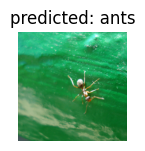

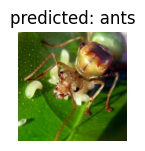

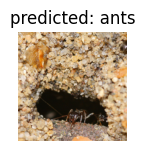

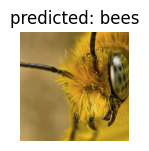

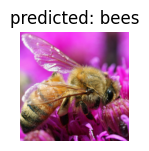

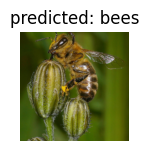

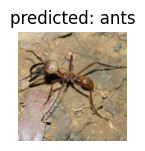

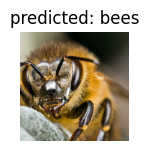

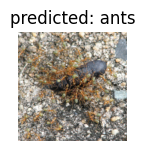

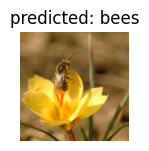

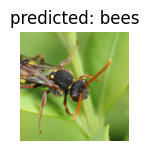

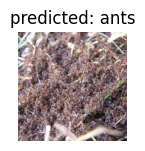

In [7]:
import numpy as np
def imshow(inp, title=None):
    inp=inp.numpy().transpose((1,2,0))
    mean=np.array([0.485,0.456,0.406])
    std=np.array([0.229,0.224,0.225])
    inp=std*inp+mean
    inp=np.clip(inp,0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def visualize_model(model,num_images=6):
    was_training=model.training
    model.eval()
    images_so_far=0
    fig =plt.figure()

    with torch.no_grad():
        for i, (inputs,labels) in enumerate(dataloaders['val']):
            inputs=inputs.to(device)
            labels=labels.to(device)

            outputs=model(inputs)
            _, preds=torch.max(outputs,1)

            for j in range(inputs.size()[0]):
                images_so_far+=1
                ax=plt.subplot(num_images//2,2,images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])
                if images_so_far==num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(model_ft)
visualize_model(model_conv)
plt.ioff()
plt.show()